# 問2 Pythonを使って母比率の区間推定

In [59]:
import numpy as np
from scipy import stats

## 1.点推定

In [61]:
p_hat = 20 / 200
p_hat

0.1

## 2.区間推定

二項分布の区間推定を使う。

In [41]:
ci = 0.95 #信頼区間(confidnece interval)

In [42]:
n = 200 #サンプル数

In [43]:
u_0025, u_0975 = stats.binom.interval(ci, n, p_hat)
u_0025, u_0975

(12.0, 29.0)

二項分布に従う確率変数が出てくるので、母比率はサンプル数で割る

In [44]:
lower = u_0025 / n
upper = u_0975 / n

In [45]:
print(f'下限={lower:.2f}\n上限={upper:.2f}')

下限=0.06
上限=0.14


### 補足（二項分布の連続補正）

In [8]:
import matplotlib.pyplot as plt

In [66]:
n = 100 #試行回数
p = 0.5 #確率

In [67]:
# 正規分布のグラフ
x1 = np.linspace(0, n, 101)
y1 = stats.norm.pdf(x1, n*p, np.sqrt(n*p*(1-p)))

In [68]:
# 二項分布のグラフ
x2 = np.arange(n) + 1
y2 = stats.binom.pmf(x2, n, p)

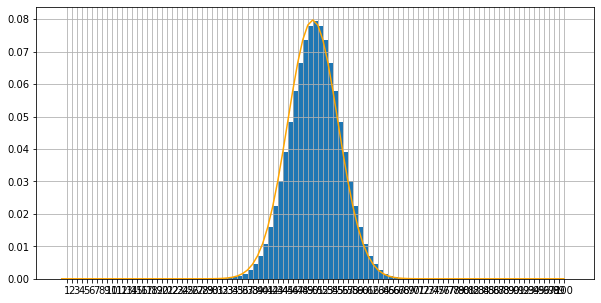

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(x1, y1, color="orange")
plt.bar(x2, y2, width=1.0, align="edge")
plt.grid()
plt.xticks(x2)
plt.show()

二項分布は離散型、正規分布は連続型であるため、近似の精度があまり良くない。<br>
そこで、連続補正することで精度を上げる。<br>
特に、nが小さいときに有効。

<img src="02.png" width=70%>

z = x - (np + 0.5) / sqrt(np(1 - p))

In [70]:
# 正規分布のグラフ
x1 = np.linspace(0, n, 101)
y1 = stats.norm.pdf(x1, n*p+0.5, np.sqrt(n*p*(1-p)))

In [71]:
# 二項分布のグラフ
x2 = np.arange(n) + 1
y2 = stats.binom.pmf(x2, n, p)

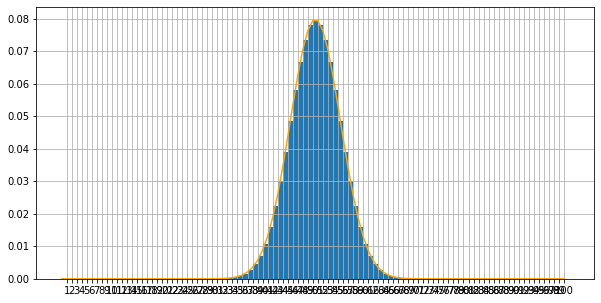

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(x1, y1, color="orange")
plt.bar(x2, y2, width=1.0, align="edge")
plt.grid()
plt.xticks(x2)
plt.show()

# 問3 母比率の差の区間推定(Pythonを使った場合)

## 区間推定

In [274]:
pA_hat = 20 / 200
pB_hat = 11 / 100

In [275]:
ci = 0.95 #信頼区間(confidnece interval)

In [276]:
#サンプル数
nA = 200 
nB = 100

In [277]:
lower = pA_hat - pB_hat - 1.96*np.sqrt(pA_hat*(1 - pA_hat) / nA + pB_hat*(1 - pB_hat) / nB)
upper = pA_hat - pB_hat + 1.96*np.sqrt(pA_hat*(1 - pA_hat) / nA + pB_hat*(1 - pB_hat) / nB)

In [278]:
print(f'下限={lower:.3f}\n上限={upper:.3f}')

下限=-0.084
上限=0.064


# 問4 母相関係数の区間推定(Pythonを使った場合)

In [79]:
n = 20

In [80]:
r = 10 / np.sqrt(20 * 30)
r

0.408248290463863

In [81]:
z = 1/2 * np.log((1+r)/(1-r))
z

0.43350736324528255

In [82]:
zeta1 = z - 1.96/np.sqrt(n-3)
zeta2 = z + 1.96/np.sqrt(n-3)
zeta1, zeta2

(-0.041862461825930064, 0.9088771883164952)

In [83]:
(np.e**(2*zeta1)-1) / (np.e**(2*zeta1)+1)

-0.04183802477952431

In [84]:
(np.e**(2*zeta2)-1) / (np.e**(2*zeta2)+1)

0.7205929036099298

# 問5 母平均の検定（母分散既知）(Pythonを使った場合)

In [285]:
data = [10.3, 10.5, 9.8, 10.2, 10.4, 10.8, 10.7, 10.7, 9.7, 9.9, 
        10.2, 10.6, 9.8, 10.2, 10.5, 10.8, 10.5, 10.9, 9.7, 9.8]

In [286]:
alpha = 0.05

In [295]:
x_bar = np.mean(data)
x_bar

10.3

In [289]:
mu0 = 10
sigma = 0.6

In [296]:
z0 = (x_bar - mu0) / np.sqrt(sigma**2 / len(data))
z0

2.2360679774997947

In [297]:
# 両側検定
stats.norm.ppf(alpha/2), stats.norm.ppf(1 - alpha/2)

(-1.9599639845400545, 1.959963984540054)

In [298]:
#左側片側検定
stats.norm.ppf(alpha)

-1.6448536269514729

In [294]:
#右片側検定
stats.norm.ppf(1 - alpha)

1.644853626951472

# 問6 検定における2種類の過誤と検出力

## 1.第一種の過誤の確率

In [187]:
alpha = 0.05 #有意水準と第一種の過誤の確率は等しい

In [219]:
loc_H0 = 0
loc_H1 = 3
scale_H0 = 1
scale_H1 = 1

x = np.linspace(-4, 7, 101)
y1 = stats.norm.pdf(x, loc=loc_H0, scale=scale_H0)
y2 = stats.norm.pdf(x, loc=loc_H1, scale=scale_H1)

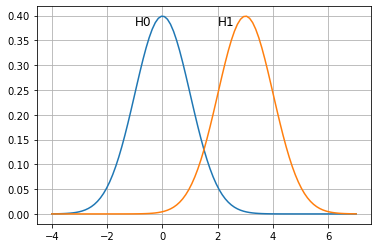

In [220]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.text(-1, 0.38, "H0", fontsize=12)
plt.text(2, 0.38, "H1", fontsize=12)
plt.grid()
plt.show()

In [221]:
#critical value
cv = stats.norm.isf(alpha, loc=loc_H0, scale=scale_H0)
cv

1.6448536269514729

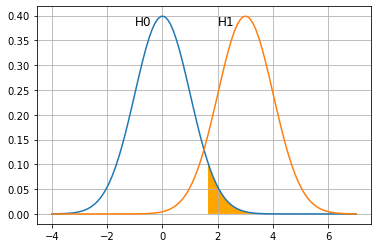

In [222]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.text(-1, 0.38, "H0", fontsize=12)
plt.text(2, 0.38, "H1", fontsize=12)

x2 = np.linspace(cv, 4, 100)
plt.fill_between(x2, stats.norm.pdf(x2, loc=loc_H0, scale=scale_H0), facecolor='orange')
plt.grid()
plt.show()

## 2.第ニ種の過誤の確率

In [223]:
beta = stats.norm.cdf(cv, loc=loc_H1, scale=scale_H1)
beta

0.08768546324970367

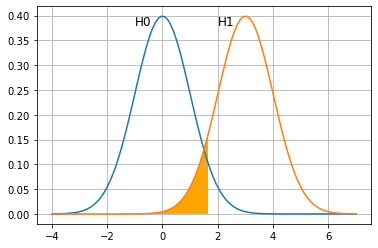

In [224]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.text(-1, 0.38, "H0", fontsize=12)
plt.text(2, 0.38, "H1", fontsize=12)

x2 = np.linspace(-2, cv, 100)
plt.fill_between(x2, stats.norm.pdf(x2, loc=loc_H1, scale=scale_H1), facecolor='orange')
plt.grid()
plt.show()

## 3.検出力

In [225]:
1 - beta

0.9123145367502963

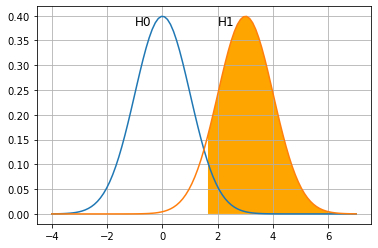

In [226]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.text(-1, 0.38, "H0", fontsize=12)
plt.text(2, 0.38, "H1", fontsize=12)

x2 = np.linspace(cv, 7, 100)
plt.fill_between(x2, stats.norm.pdf(x2, loc=loc_H1, scale=scale_H1), facecolor='orange')
plt.grid()
plt.show()